# [作業目標]
* 利用範例的創建方式, 創建一組資料, 並練習如何取出最大值

# [作業重點]
* 練習創立 DataFrame (In[2])
* 如何取出口數最多的國家 (In[3], Out[3])

# 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: 隨機產生數值https://blog.csdn.net/christianashannon/article/details/78867204

In [1]:
import pandas as pd
import numpy as np

In [2]:
country=['Taiwan','America','Japan','Italy','Sweden','Korea','Thailand','United Kingdom']
#people=np.random.rand(8) #隨機生成數值，需記得兩筆資料的長度要一樣
people=np.random.randint(200000,size=8) #可設定隨機值的最大範圍，size為random的個數
data={'國家':country,
        '人口':people}
data=pd.DataFrame(data)
data=data.reindex(columns=['國家','人口'])
data

,國家,人口
0,Taiwan,18233
1,America,83196
2,Japan,58900
3,Italy,147022
4,Sweden,162887
5,Korea,154416
6,Thailand,56572
7,United Kingdom,136752


In [3]:
max_value=data.loc[data['人口'].idxmax()] #找出最大值
print(max_value)

國家    Sweden
人口    162887
Name: 4, dtype: object


In [4]:
print("人口最多的國家為",data['國家'][data['人口'].idxmax()],"人口數為",data['人口'].max())

人口最多的國家為 Sweden 人口數為 162887


-------------------------

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [7]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [8]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [9]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.split(split_tag)
print(len(data))
print(data[0])
print(data[1])
print(data[2])

9996
n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238	http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
n00015388_304	http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg


## 將 txt 轉成 pandas dataframe

In [10]:
import pandas as pd
a=[]

for i in data:
    b=i.split("\t")
    a.append(b)
    
arrange_data=a
df = pd.DataFrame(arrange_data,columns=["n00_col","url_col"])
df.head()

,n00_col,url_col
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

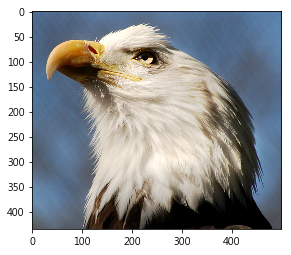

In [11]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0][1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [12]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=[]
    for url in url_list:
        response=requests.get(url)
        try:
            img=Image.open(BytesIO(response.content))
            img_list.append(img)
        except:
            print("Not Found")
    
    return img_list

Not Found
Total images that we got: 4 


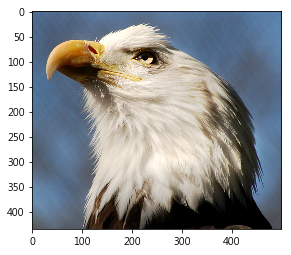

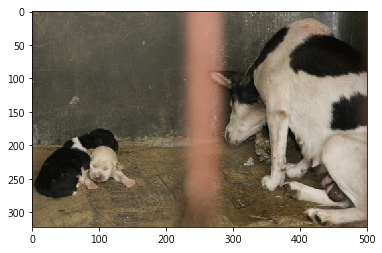

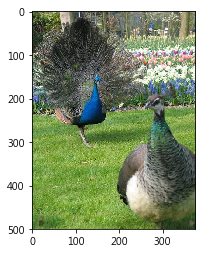

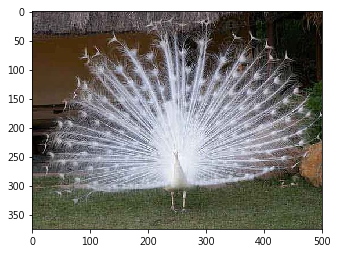

In [13]:
result = img2arr_fromURLs(df[0:5]['url_col'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()